In [7]:
from pharynx_analysis import (pharynx_io as pio, image_processing as ip, experiment, plots, profile_processing as pp)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import xarray as xr
from importlib import reload
from skimage import measure, transform
from collections import namedtuple
import pdb
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import scale
import pandas as pd
from scipy.signal import find_peaks
from pprint import pprint
from pathlib import Path
from skimage import io as skio
import matplotlib.patches as patches

from scipy.spatial import distance

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

reload(pio);
reload(ip);
reload(experiment);
reload(plots);

dir_path = Path(
    "/Users/sean/code/wormAnalysis/data/paired_ratio/2019_04_03_ASI_ablation"
)

In [3]:
ex = experiment.PairExperiment(dir_path,"TL/470/410/470/410", strategy='blah')
ex.full_pipeline()

08:01:31 INFO:Starting full pipeline run for /Users/sean/code/wormAnalysis/data/paired_ratio/2019_04_03_ASI_ablation
08:01:31 INFO:Loading Images
08:01:31 INFO:Segmenting pharynxes
08:01:33 INFO:Centering and rotating pharynxes
100%|██████████| 123/123 [00:11<00:00, 11.00it/s]
08:01:45 INFO:Calculating midlines
100%|██████████| 123/123 [00:01<00:00, 93.93it/s] 
08:01:46 INFO:Measuring under midlines
100%|██████████| 123/123 [00:03<00:00, 30.78it/s]
08:01:50 INFO:Trimming intensity data
08:01:51 INFO:Calculating redox measurements
/Users/sean/.local/share/virtualenvs/worm/lib/python3.7/site-packages/xarray/core/computation.py:564: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
08:01:52 INFO:Saving 2019_04_03_ASI_ablation inside /Users/sean/code/wormAnalysis/data/paired_ratio/2019_04_03_ASI_ablation
08:01:52 INFO:Saving region means to /Users/sean/code/wormAnalysis/data/paired_ratio/2019_04_03_ASI_ablation/analyses/2019-08-13_blah/2019_04_03_ASI_ablati

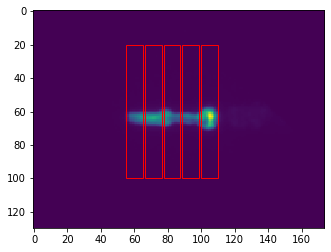

In [67]:
ax = plt.imshow(ex.rot_fl.sel(pair=0, wavelength='410').isel(spec=0))

plt.

bbox_xs = np.linspace(55, 100, 5)
for x in bbox_xs:
    rect = patches.Rectangle((x, 20), 10, 80, edgecolor='r', linewidth=1, facecolor='none')
    plt.gca().add_patch(rect)

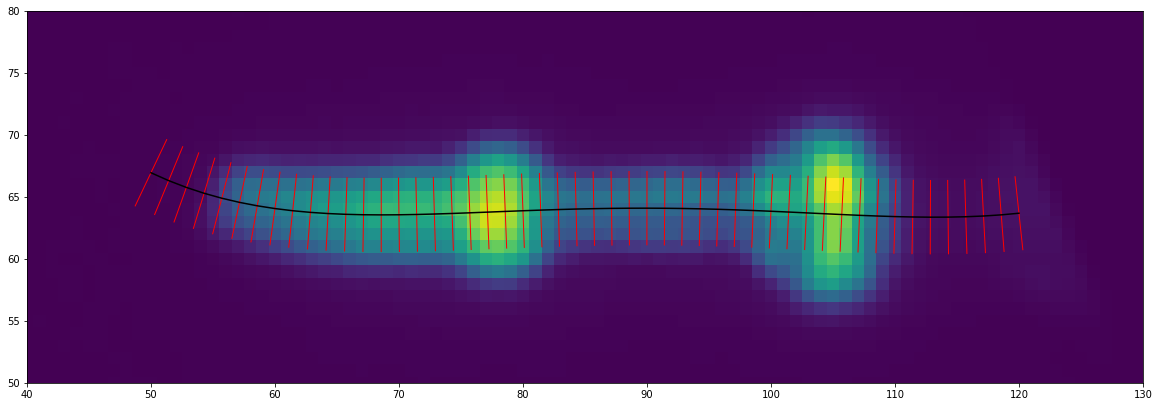

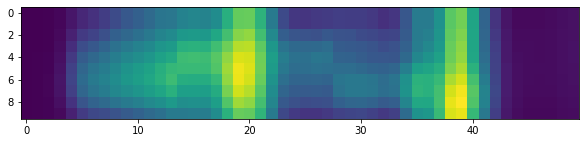

In [32]:
i = i
I = ex.rot_fl.sel(wavelength='410', pair=0).isel(spec=i)
mids = ex.midlines
mid = mids[i]['410'][0]
der = mid.deriv()

xs = np.linspace(50, 120, 50)
ys = mid(xs)

normal_slopes = -1/der(xs)
normal_thetas = np.arctan(normal_slopes)

mag = 3
x0 = np.cos(normal_thetas) * mag
y0 = np.sin(normal_thetas) * mag

x1 = np.cos(normal_thetas) * -mag
y1 = np.sin(normal_thetas) * -mag

xs0 = xs + x0
xs1 = xs + x1
ys0 = ys + y0
ys1 = ys + y1

lines = [list(x) for x in zip(zip(xs0, ys0), zip(xs1, ys1))]
lc = LineCollection(lines, linewidths=1, color=np.repeat(['r'], len(lines)))
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(I)
ax.plot(xs, ys, color='k')
ax.add_collection(lc)
ax.set_aspect('equal')
ax.set_xlim(40,130)
ax.set_ylim(50,80)

prof = [
    np.mean(
        measure.profile_line(
            I,
            (xs0[i], ys0[i]), (xs1[i], ys1[i]), order=1, linewidth=1
        )
    )
    for i in range(len(xs0))
]
straightened = []
for i in range(len(xs0)):
    line = measure.profile._line_profile_coordinates((xs0[i], ys0[i]), (xs1[i], ys1[i]))[:,:,0]
    xs = xr.DataArray(line[0], dims='z')
    ys = xr.DataArray(line[1], dims='z')
    straightened.append(pp.trim_profile(I.interp(x=xs, y=ys).data, 0, 10))
straightened = np.stack(straightened).T
prof = np.mean(straightened, axis=0)


plt.figure(figsize=(10,40))
plt.imshow(np.flipud(np.stack(straightened)));

# Compare line thickness errors

In [440]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [441]:
from scipy.stats import norm

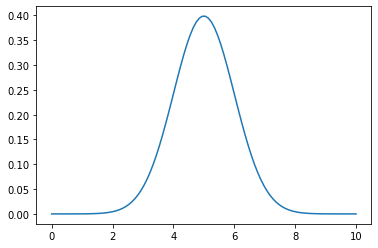

In [465]:
vector_length = 10
rv = norm(loc = vector_length/2, scale = vector_length/10)
x = np.linspace(0, vector_length, 100)
plt.plot(x, rv.pdf(x))